<a href="https://colab.research.google.com/github/itsmesudhanshu/1-module-EDA-capstone-/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/data science/module 1/capstone project/Copy of Hotel Bookings.csv'
hotel_df = pd.read_csv(file_path)

In [ ]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can notice that maximum columns has non-null values by using 'info()' method. There are 4 columns('country', 'children', 'agent, 'company') with null values. Hence, sort the non-null values in rows of that columns. so that, working on data can be made flexible. 

In [ ]:
hotel_df.isna().sum().sort_values(ascending = False).head()

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [ ]:
new_hotel_df = hotel_df.copy()

In [ ]:
# sorting null values of the above 4 columns 
No_Null_company_df = new_hotel_df[~new_hotel_df['company'].isna()]
No_Null_company_df.shape

(6797, 32)

In [ ]:
No_Null_agent_df = new_hotel_df[~new_hotel_df['agent'].isna()]
No_Null_agent_df.shape

(103050, 32)

In [ ]:
No_Null_country_df = new_hotel_df[~new_hotel_df['country'].isna()]
No_Null_country_df.shape

(118902, 32)

In [ ]:
No_Null_children_df = new_hotel_df[~new_hotel_df['children'].isna()]
No_Null_children_df.shape

(119386, 32)

#<u>***Visualization***</u>:

###1. Types of Hotels and there bookings:

In [ ]:
type_of_hotels = hotel_df['hotel'].value_counts()
type_of_hotels 

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
type_of_hotels.index

Index(['City Hotel', 'Resort Hotel'], dtype='object')

### There are 66.4% of City Hotels and 33.5% of Resort Hotels available 

Text(0.5, 1.0, 'Types of hotels')

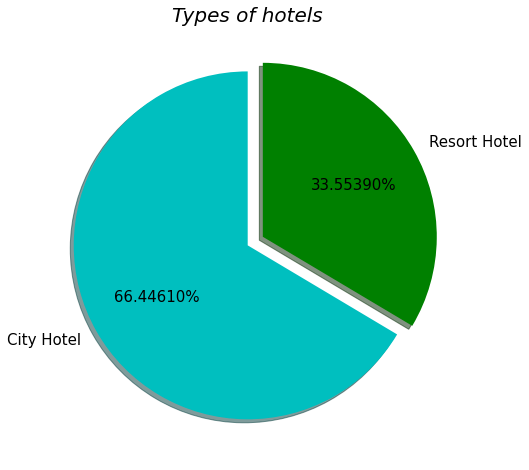

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)

explode = (0, 0.1)
plt.pie(type_of_hotels, explode, autopct='%1.5f%%', colors = ['c','g'], 
        shadow=True, startangle=90, labels = type_of_hotels.index, textprops={'fontsize': 15} )
plt.title('Types of hotels', fontsize = 20, fontstyle = 'italic')






###2. Booking cancellation info :

In [ ]:
cancellation_details = hotel_df.groupby('hotel')['is_canceled'].value_counts()
cancellation_details

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Percentage of bookings that are canceled at diffrent type of hotels')

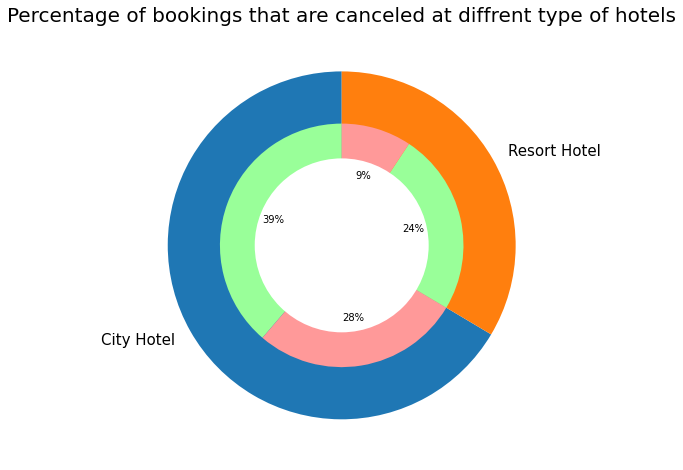

In [ ]:
plt.pie(type_of_hotels, startangle=90,frame=True, labels = type_of_hotels.index, textprops={'fontsize': 15})
plt.pie(cancellation_details,radius=0.70,autopct='%1.0f%%',startangle=90, colors = ['#99ff99', '#ff9999'])

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
plt.gcf().gca().add_artist(centre_circle)

plt.title('Percentage of bookings that are canceled at diffrent type of hotels', fontsize=20)

###we can observe from the above pie visualization that the max bookings and cancelations are happening in city hotel.
total bookings that are cancelled = (28%+9%) = 37%

total bookings that are not cancelled = (39%+24%) = 63%
1.   green = bookings not cancelled
2.   pink = bookings cancelled


###3. Hotel Bookings based on meals: 



- RO: Room only

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- AI: All Inclusive (all services of full board plus any others specified in each case)

In [ ]:
bookings_based_on_meals = hotel_df['meal'].value_counts()
bookings_based_on_meals

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

Text(0.5, 1.0, 'Hotel Bookings Based On Meals')

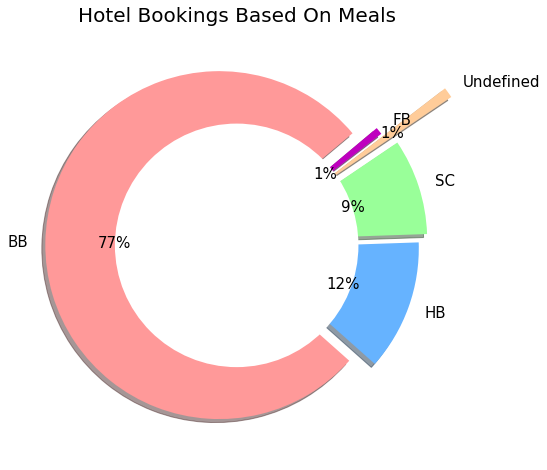

In [ ]:
# visualization of Hotel Bookings Based on Meals:
centre_circle = plt.Circle((0,0),0.70,fc='white')

plt.pie(bookings_based_on_meals, colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'm'], explode = (0.1,0.05,0.1,0.5,0.05), labels=bookings_based_on_meals.index, 
        textprops={'fontsize': 15}, autopct='%1.0f%%', startangle=40, shadow=True)

plt.gcf().gca().add_artist(centre_circle)
plt.title('Hotel Bookings Based On Meals', fontsize=20)

###From the above pie visualization we can conclude that 77% of Hotel Bookings are happening on 'BB' meal type i.e, 'BB: Bed & Breakfast'

###4. Month wise booking:

In [ ]:
new_hotel_df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Month wise Hotel Booking')

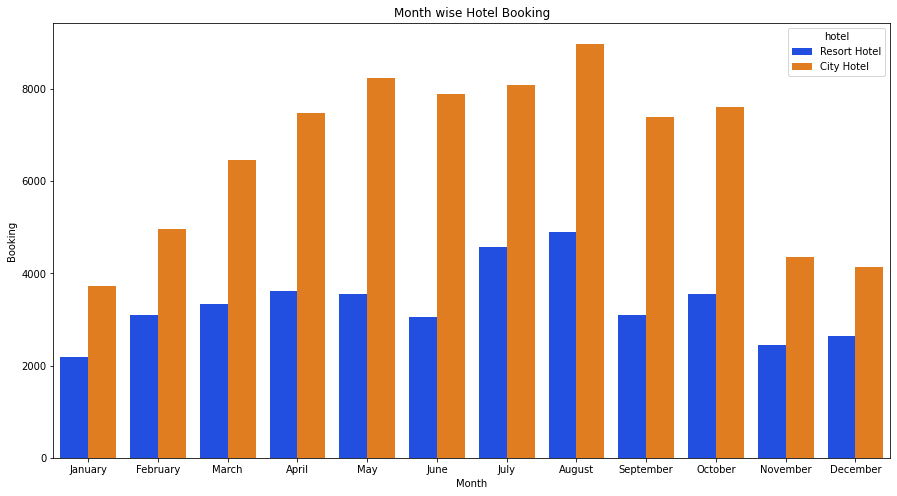

In [ ]:
sns.countplot(x=new_hotel_df['arrival_date_month'],order=['January','February','March','April','May','June','July','August','September','October','November','December'],hue=new_hotel_df["hotel"],
              palette='bright')
plt.xlabel('Month')
plt.ylabel('Booking')
plt.title("Month wise Hotel Booking")

###5. Top countries from most visited people :

In [ ]:
new_hotel_df['country'].value_counts().head(10)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Making data frame of top 10 countries only 

In [ ]:
top10 = new_hotel_df[new_hotel_df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL","BEL","BRA","NLD"])]

Plotting the bar plot of top 10 countries


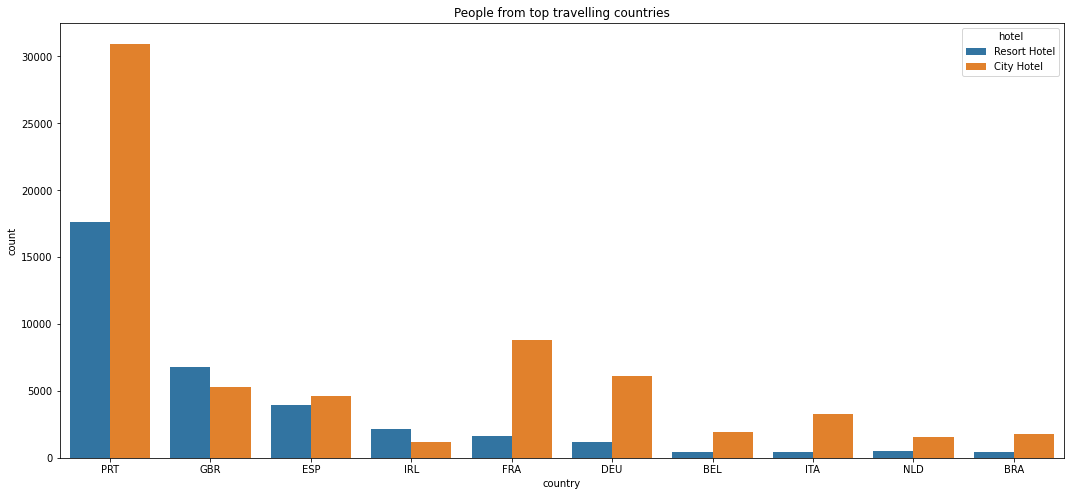

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='country',hue='hotel',data=top10)
plt.title('People from top travelling countries')
plt.show()

From the above bar chart visualization we can notice that most of the hotel bookings are happening in "PTR(Portugal)" country and vise versa. we can also abserve that the maximum people are preferring city hotels compared to Resort Hotels.

###6. The room type bookings :

In [ ]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [ ]:
colms = ['arrival_date_year', 'arrival_date_week_number']
new_hotel_df['arrival_month_year'] = new_hotel_df[colms].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [ ]:
new_hotel_df.iloc[:]['arrival_month_year']

0         2015-27
1         2015-27
2         2015-27
3         2015-27
4         2015-27
           ...   
119385    2017-35
119386    2017-35
119387    2017-35
119388    2017-35
119389    2017-35
Name: arrival_month_year, Length: 119390, dtype: object

In [ ]:
reserved_room_type_df = new_hotel_df.groupby(['arrival_month_year'])['reserved_room_type'].value_counts().unstack().fillna(0)
reserved_room_type_df

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_month_year,,,,,,,,,,
2015-27,268.0,0.0,6.0,37.0,27.0,7.0,9.0,5.0,0.0,0.0
2015-28,344.0,2.0,11.0,55.0,42.0,9.0,16.0,5.0,1.0,0.0
2015-29,557.0,0.0,7.0,65.0,33.0,9.0,12.0,7.0,3.0,0.0
2015-30,599.0,6.0,12.0,79.0,44.0,7.0,19.0,4.0,0.0,0.0
2015-31,407.0,7.0,12.0,72.0,41.0,14.0,19.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2017-5,664.0,2.0,7.0,70.0,40.0,21.0,11.0,3.0,0.0,0.0
2017-6,616.0,6.0,4.0,98.0,57.0,16.0,9.0,6.0,0.0,0.0
2017-7,846.0,1.0,8.0,174.0,58.0,37.0,30.0,6.0,0.0,0.0


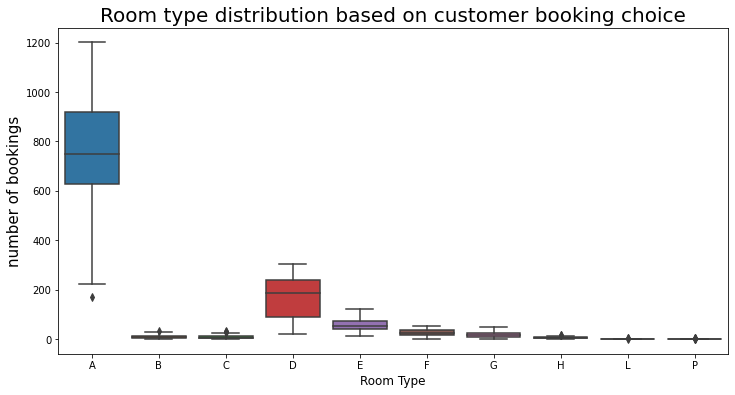

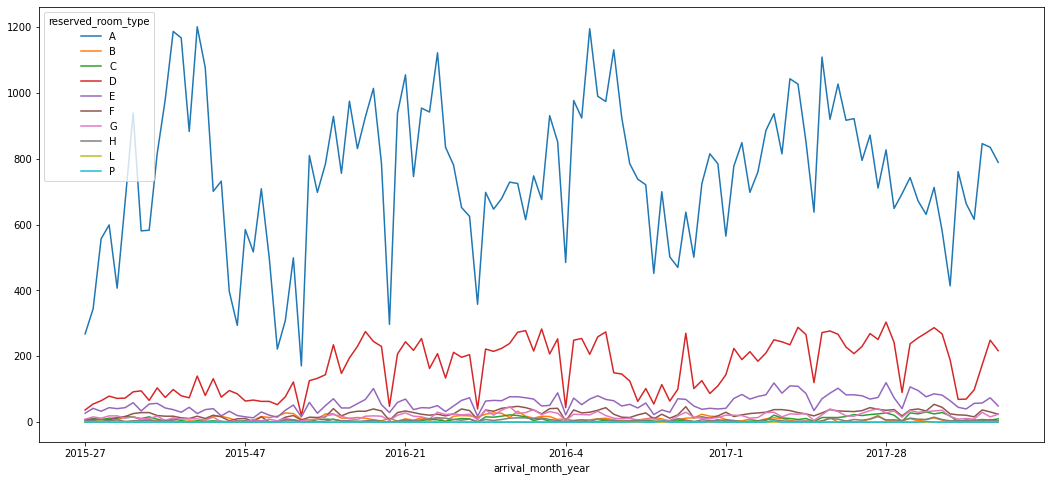

In [ ]:
# reserved room type distribution box plot
plt.figure(figsize=(12,6))
fig = sns.boxplot(data = reserved_room_type_df)

plt.title('Room type distribution based on customer booking choice', fontsize = 20)
plt.ylabel('number of bookings', fontsize = 15)
plt.xlabel('Room Type', fontsize = 12)

''' Multiline plot is used to show the reserved room type choices over previous years-week '''
reserved_room_type_df.plot(figsize = (18,8))

Box plot - Whiskers are set at 1.5 * IQR ( Q3 - Q1)

###7. The possiblity of getting the reserved room type:

In [ ]:
# This dataframe shows information of assigned rooms over reserved rooms using type of rooms data from previous records

possibility_of_getting_room_df = new_hotel_df.groupby(['reserved_room_type'])['assigned_room_type'].value_counts().unstack().fillna(0)
possibility_of_getting_room_df

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73598.0,1123.0,1447.0,7548.0,1156.0,417.0,186.0,94.0,215.0,210.0,0.0,0.0
B,111.0,988.0,0.0,5.0,2.0,2.0,8.0,0.0,0.0,2.0,0.0,0.0
C,5.0,2.0,883.0,6.0,4.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0
D,312.0,27.0,34.0,17736.0,686.0,204.0,82.0,9.0,67.0,44.0,0.0,0.0
E,15.0,3.0,8.0,22.0,5923.0,404.0,100.0,4.0,40.0,16.0,0.0,0.0
F,6.0,17.0,0.0,4.0,31.0,2707.0,116.0,3.0,10.0,3.0,0.0,0.0
G,5.0,2.0,2.0,0.0,4.0,14.0,2041.0,7.0,15.0,4.0,0.0,0.0
H,0.0,0.0,0.0,1.0,0.0,0.0,10.0,584.0,6.0,0.0,0.0,0.0
L,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# correlation matrix of probability of getting room types

corr_df = possibility_of_getting_room_df.corr()
corr_df

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
assigned_room_type,,,,,,,,,,,,
A,1.000000,0.718992,0.838412,0.305333,0.071220,0.017127,-0.039224,0.043178,0.947614,0.978576,-0.111859,-0.111874
B,0.718992,1.000000,0.550767,0.149305,-0.047595,-0.086326,-0.129844,-0.066064,0.623459,0.684343,-0.170561,-0.171354
C,0.838412,0.550767,1.000000,0.206980,-0.012678,-0.072209,-0.111519,-0.028731,0.781360,0.801727,-0.163999,-0.164693
D,0.305333,0.149305,0.206980,1.000000,0.012914,-0.061646,-0.108643,-0.097246,0.542541,0.482099,-0.152234,-0.152234
E,0.071220,-0.047595,-0.012678,0.012914,1.000000,0.012265,-0.106442,-0.137348,0.225006,0.137724,-0.148271,-0.148271
F,0.017127,-0.086326,-0.072209,-0.061646,0.012265,1.000000,-0.101155,-0.157395,0.021266,0.013269,-0.157110,-0.157530
G,-0.039224,-0.129844,-0.111519,-0.108643,-0.106442,-0.101155,1.000000,-0.137723,-0.029897,-0.049633,-0.142250,-0.142250
H,0.043178,-0.066064,-0.028731,-0.097246,-0.137348,-0.157395,-0.137723,1.000000,-0.010410,0.003465,-0.135223,-0.137149
I,0.947614,0.623459,0.781360,0.542541,0.225006,0.021266,-0.029897,-0.010410,1.000000,0.990692,-0.192286,-0.192286


The above correlation matrix indicates probability of getting type of rooms over customer choice of reserved type of rooms. 

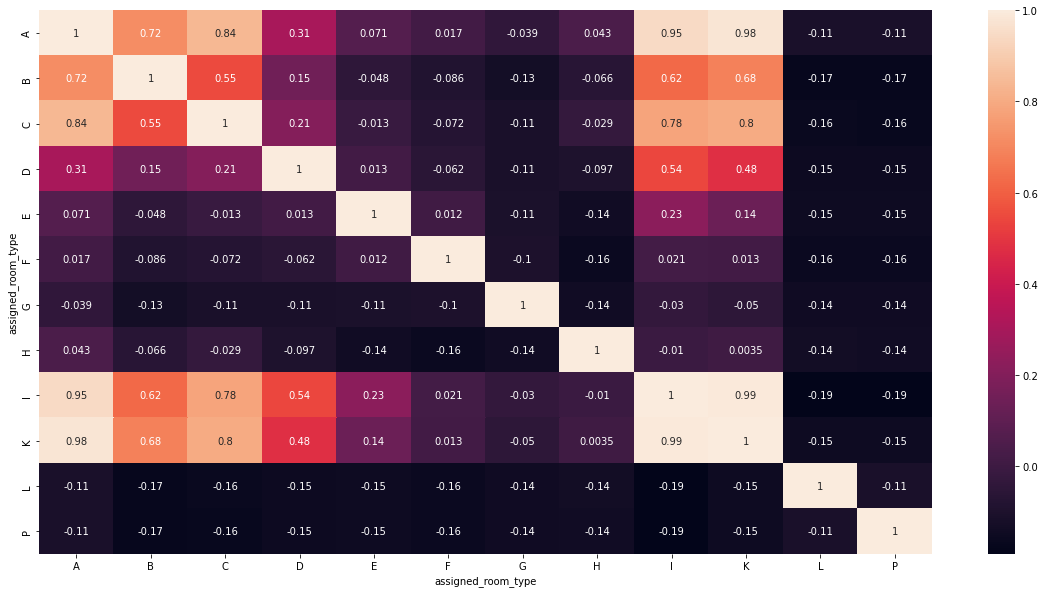

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True)
#cmap = "RdBu"


### The lighter color indicates the more probability of getting the reserved type of room and the darker color indicates the low/no probability of getting the room of customer choice.

###8. Analysing Lead Time Of Bookings:

Booking or Reservation **Lead Time** is the period of time (most typically measured in calendar days) between when a guest makes the reservation and the actual check-in/arrival date

####calculating lead time with respect to arrival date

In [ ]:
# gathering the arrival date info
colms_1 = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
new_hotel_df['arrival_date'] = new_hotel_df[colms_1].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
colms_2 = ['arrival_date_month', 'arrival_date_day_of_month']
new_hotel_df['arrival_month_date'] = new_hotel_df[colms_2].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
new_hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,arrival_date,arrival_month_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27,2015-July-1,July-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-27,2015-July-1,July-1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27,2015-July-1,July-1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-27,2015-July-1,July-1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-27,2015-July-1,July-1


In [ ]:
# Analysing the lead time and date in year, weeks, months and days: 
date = new_hotel_df.iloc[:]['arrival_date']
time = new_hotel_df.iloc[:]['lead_time']
year_date = new_hotel_df.iloc[:]['arrival_date_year']
week_date = new_hotel_df.iloc[:]['arrival_date_week_number']

Lead time taken for all the previous years bookings

In [ ]:
lead_time_df = pd.DataFrame({"arrival_date_1" : week_date, "lead_time_1" : time})
lead_time_df

,arrival_date_1,lead_time_1
0,27,342
1,27,737
2,27,7
3,27,13
4,27,14
...,...,...
119385,35,23
119386,35,102
119387,35,34
119388,35,109


Text(27.125, 0.5, 'lead_time')

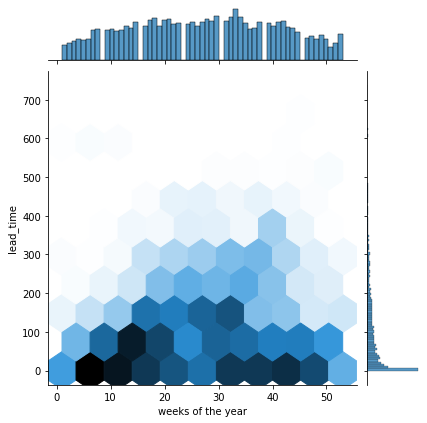

In [ ]:
# lead time analysis by months of the year 2015

sns.jointplot(kind = 'hex', x='arrival_date_1', y='lead_time_1', data =lead_time_df, gridsize=10)

#setting labels for x, y and set title for lineplot
plt.xlabel('weeks of the year')
plt.ylabel('lead_time')



###9. Analysis of lead time year by year:



---





In [ ]:
lead_time_year_df = pd.DataFrame({"arrival_year" : year_date, "lead_time_2" : time})

###`Lead time per Month in the year 2015:`








In [ ]:
# lead time for the hotel booking in the year- 2015
lead_time_list_1 =[]
year_list =[]
week_list_1 =[]
month_list =[]
month_date_list =[]
hotel_list_1 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2015):
      lead_time_list_1.append(new_hotel_df.loc[index, 'lead_time'])
      year_list.append(new_hotel_df.loc[index,'arrival_date'])
      week_list_1.append(new_hotel_df.loc[index,'arrival_date_week_number'])
      month_list.append(new_hotel_df.loc[index,'arrival_date_month'])
      month_date_list.append(new_hotel_df.loc[index,'arrival_month_date'])
      hotel_list_1.append(new_hotel_df.loc[index,'hotel'])
  

### `Lead time per Month in the year 2016:`

In [ ]:
# lead time for the hotel booking in the year- 2016
lead_time_list_2 =[]
hotel_list_2 =[]
week_list_2 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2016):
      lead_time_list_2.append(new_hotel_df.loc[index, 'lead_time'])
      hotel_list_2.append(new_hotel_df.loc[index,'hotel'])
      week_list_2.append(new_hotel_df.loc[index,'arrival_date_week_number'])

###` Lead time per Month in the year 2017:`

In [ ]:
# lead time for the hotel booking in the year- 2017
lead_time_list_3 =[]
hotel_list_3=[]
week_list_3 =[]
for index, row in lead_time_year_df.iterrows():
    if (lead_time_year_df.loc[index,'arrival_year'] == 2017):
      lead_time_list_3.append(new_hotel_df.loc[index, 'lead_time'])
      hotel_list_3.append(new_hotel_df.loc[index,'hotel'])
      week_list_3.append(new_hotel_df.loc[index,'arrival_date_week_number'])

In [ ]:
# a_list_1 = pd.DataFrame({'lead_time_15' : lead_time_list_1, 'year' : year_list, 'week' : week_list, 'month_15' :month_list_1, 'hotel_15' : hotel_list_1})
a_list_1 = pd.DataFrame({'lead_time_15' : lead_time_list_1, 'week_15': week_list_1})
a_list_2 = pd.DataFrame({'lead_time_16' : lead_time_list_2, 'week_16': week_list_2})
a_list_3 = pd.DataFrame({'lead_time_17' : lead_time_list_3, 'week_17': week_list_3})

In [ ]:
a_list_1

,lead_time_15,week_15
0,342,27
1,737,27
2,7,27
3,13,27
4,14,27
...,...,...
21991,4,35
21992,0,42
21993,1,50
21994,0,51


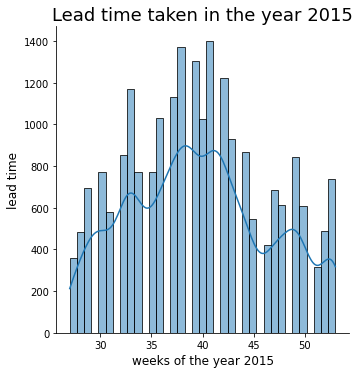

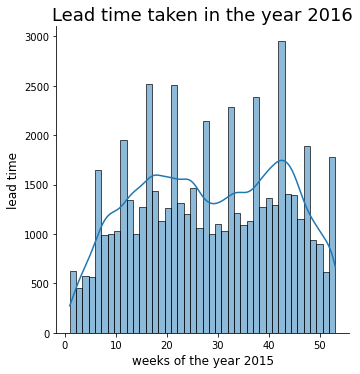

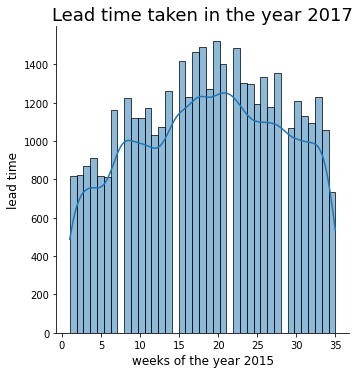

In [ ]:
# lead time analysis by months of the year 2015

sns.displot(data=a_list_1, x="week_15", kde=True)

plt.xlabel('weeks of the year 2015', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2015", fontsize = 18)
plt.show()


# lead time analysis by months of the year 2016

sns.displot(data=a_list_2, x="week_16", kde=True)

plt.xlabel('weeks of the year 2015', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2016", fontsize = 18)
plt.show()


# lead time analysis by months of the year 2017

sns.displot(data=a_list_3, x="week_17", kde=True)

plt.xlabel('weeks of the year 2015', fontsize = 12)
plt.ylabel('lead time', fontsize = 12)
plt.title("Lead time taken in the year 2017", fontsize = 18)
plt.show()

Analyzing on the basis of distribution channel.

###10.Distribution channel vs median lead time.
Distribution channel is the costumer accessed by corporate booking/Direct/Travel agent(TA).Travel operator(TO)
and Median lead time is the median of number of days that elapsed between the entering date of the booking into the PMS and arriving date.


In [ ]:
distribution_channel_booking = new_hotel_df.groupby('distribution_channel')
nhd1 = pd.DataFrame(round(distribution_channel_booking['lead_time'].median(),3)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
print(nhd1)

  distribution_channel  median_lead_time
0            Corporate               9.0
1               Direct              19.0
2                  GDS              10.0
3                TA/TO              83.0
4            Undefined               2.0


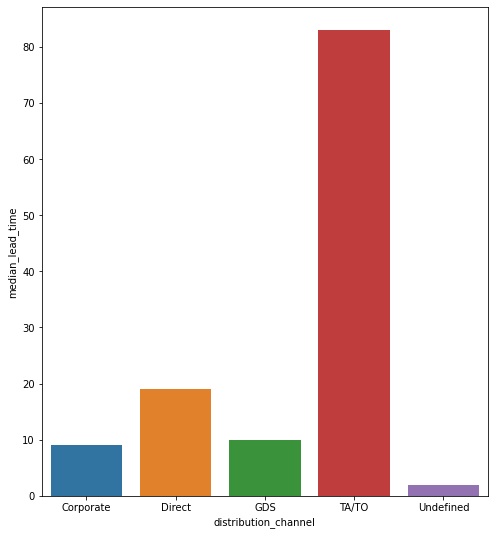

In [ ]:
plt.figure(figsize = (8,9))
sns.barplot(x = nhd1['distribution_channel'], y = nhd1['median_lead_time'])
plt.show()

###Revenue generated through various distribution channels.

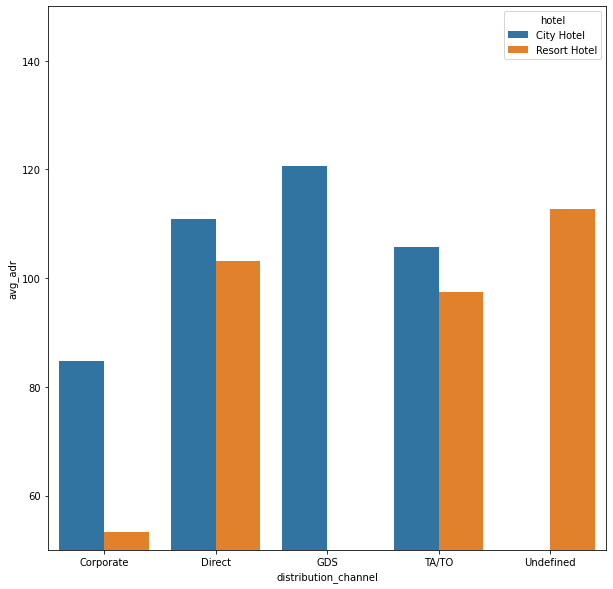

In [57]:
distribution_channel = new_hotel_df.groupby(['distribution_channel', 'hotel'])
dc1 = pd.DataFrame(round((distribution_channel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (10,10))
sns.barplot(x = dc1['distribution_channel'], y = dc1['avg_adr'], hue = dc1['hotel'])
plt.ylim(50,150)
plt.show()

11.Number of days people stay in the hotel :   


total stay is the number of stay in the hotel

count is the number of booking

In [ ]:
new_hotel_df['total_stay'] = new_hotel_df['stays_in_weekend_nights']+new_hotel_df['stays_in_week_nights']

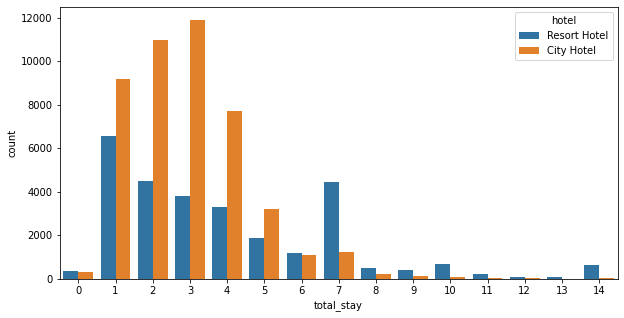

In [ ]:
not_canceled = new_hotel_df[new_hotel_df['is_canceled'] == 0]


s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

We can see that majority of people stay or do a booking of 7 or less than 7 days